In [880]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import ast
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Data loading

In [948]:
df = pd.read_csv('data/movie_features_v5.csv')

In [949]:
display(df.head())

,movie_id,title,budget,revenue,release_date,runtime,original_language,genres,production_countries,spoken_languages,...,average_actor_exp,min_actor_exp,max_actor_exp,multiplier,year,year_group,category,title_word_count,release_quarter,spoken_languages_count
0,507089.0,Five Nights at Freddy's,20000000.0,271900000.0,2023-10-25,110.0,en,"['Horror', 'Mystery']",['United States of America'],['English'],...,5.600000,0.0,14.0,13.595000,2023,2020,low,4,4,1
1,951491.0,Saw X,13000000.0,100900000.0,2023-09-26,118.0,en,"['Horror', 'Thriller']",['United States of America'],"['Norsk', 'Español', 'English']",...,5.857143,0.0,11.0,7.761538,2023,2020,low,2,3,3
2,762430.0,Retribution,20000000.0,16700000.0,2023-08-23,91.0,en,"['Action', 'Thriller', 'Crime']","['France', 'Germany', 'United States of America']","['Deutsch', 'English']",...,9.142857,0.0,41.0,0.835000,2023,2020,low,1,3,2
3,678512.0,Sound of Freedom,14500000.0,247800000.0,2023-07-03,131.0,en,"['Action', 'Drama']",['United States of America'],"['English', 'Español']",...,7.285714,1.0,13.0,17.089655,2023,2020,low,3,3,2
4,820525.0,After Everything,14000000.0,9700000.0,2023-09-13,93.0,en,"['Romance', 'Drama']",['United States of America'],"['English', 'Português']",...,3.200000,0.0,8.0,0.692857,2023,2020,low,2,3,2


In [950]:
original_language_onehot = pd.get_dummies(df['original_language'], prefix='onehot', prefix_sep='_')
df = pd.concat([df, original_language_onehot], axis=1)

In [951]:
def get_column_per_value(df, column_name):
    df[column_name] = df[column_name].apply(ast.literal_eval)

    # Extract unique genres
    unique_genres = set(genre for genres_list in df[column_name] for genre in genres_list)

    # Create one-hot encoded columns for each genre
    for genre in unique_genres:
        df[f'onehot_{column_name}_' + genre.lower()] = df[column_name].apply(lambda x: 1 if genre in x else 0)

In [952]:
get_column_per_value(df, 'genres')
get_column_per_value(df, 'production_countries')
# get_column_per_value(df, 'spoken_languages')

we transform all the boolean columns into integer type to have the same types for all the columns.

In [953]:
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)

In [954]:
df.rename(columns={"onehot_genres_science fiction": "onehot_genres_science_fiction", "onehot_production_countries_united states of america": "onehot_production_countries_united_states_of_america"}, inplace=True)

We create the input_df where we remove all the features that a producers can't have an impact on + the column for which we have created the dummy varaibles. We also create the output variable that is the multiplier.

In [1009]:
input_df = df.drop(['multiplier','budget', 'revenue', 'movie_id', 'release_date', 'title', 'year', 'year_group', 'genres', 'original_language', 'production_countries', 'spoken_languages'], axis=1)
input_df = sm.add_constant(input_df)
display(input_df.head())
output_df = df['multiplier']

,const,runtime,number_characters,below18,above60,male_ratio,average_age,max_age,min_age,average_popularity,...,onehot_production_countries_austria,onehot_production_countries_germany,onehot_production_countries_kazakhstan,onehot_production_countries_liechtenstein,onehot_production_countries_taiwan,onehot_production_countries_united kingdom,onehot_production_countries_south africa,onehot_production_countries_botswana,onehot_production_countries_argentina,onehot_production_countries_united_states_of_america
0,1.0,110.0,5.0,0.200000,0.000000,0.600000,36.800000,57.0,12.0,56.929800,...,0,0,0,0,0,0,0,0,0,1
1,1.0,118.0,7.0,0.000000,0.142857,0.571429,54.000000,81.0,24.0,22.167857,...,0,0,0,0,0,0,0,0,0,1
2,1.0,91.0,7.0,0.142857,0.285714,0.428571,43.285714,71.0,16.0,39.837857,...,0,1,0,0,0,0,0,0,0,1
3,1.0,131.0,7.0,0.000000,0.142857,0.857143,53.000000,70.0,30.0,17.398429,...,0,0,0,0,0,0,0,0,0,1
4,1.0,93.0,10.0,0.000000,0.000000,0.500000,37.100000,60.0,25.0,23.053900,...,0,0,0,0,0,0,0,0,0,1


we create the two categories low and high

In [1010]:
input_l = input_df[input_df['category'] == 'low'].drop(['category'], axis=1)
input_h = input_df[input_df['category'] == 'high'].drop(['category'], axis=1)
output_l = output_df[input_df['category'] == 'low']
output_h = output_df[input_df['category'] == 'high']

For each category we remove the outliers so the really low bugdets for the low budgets category and the really high ones for the high budget category.

In [1011]:
def remove_outliers(input, output, low=0.2, high=0.8):
    threshold_low = output.quantile(low)
    threshold_high = output.quantile(high)
    input = input[output < threshold_high]
    input = input[output > threshold_low]
    output = output[output < threshold_high]
    output = output[output > threshold_low]
    return input, output

In [1012]:
input_low, output_low = remove_outliers(input_l, output_l, low=0.2, high=1)
input_high, output_high = remove_outliers(input_h, output_h, low=0.2, high=0.8)

C:\Users\jojod\AppData\Local\Temp\ipykernel_21676\2873073568.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  input = input[output > threshold_low]
C:\Users\jojod\AppData\Local\Temp\ipykernel_21676\2873073568.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  input = input[output > threshold_low]


we remove the the onehot features column where we have less than 20 values because that means that we will have less than 20 film corresponding to the category and we consider that it is not enaugh to generalize.

In [1013]:
for col in input_high.columns:
    if (input_high[col].sum() < 20) and ('onehot' in col):
        # print(col)
        input_high.drop(col, axis=1, inplace=True)

In [1014]:
for col in input_low.columns:
    if (input_low[col].sum() < 10) and ('onehot' in col):
        # print(col)
        input_low.drop(col, axis=1, inplace=True)

### Min Max scaling

We scale our column with minmax scaling the column to be have comparable range of [0,1] between all the features and not have some artefacts due to the fact that one feature is a lot bigger than the others.
We store the scaler to be able to reverse the scaling at the end of the optimisation.

we use this scaling method and not standardization of normalization, because the minmax scaling does not reduce the effect of outliers, but it linearily scales them down into a fixed range. this is good in our case because we want the model to not overfit the outliers and so to keep them as 'outliers'.

use inverse_transform(X) to get the original values

In [1015]:
def minmax_scale_input(input):
    scaler = MinMaxScaler()
    scaler.fit(input)
    minmax_input = pd.DataFrame(scaler.transform(input))
    minmax_input.columns = input.columns
    minmax_input.index = input.index
    return minmax_input, scaler

In [1016]:
scaled_input_low, scaler_low_budget = minmax_scale_input(input_low)
scaled_input_high, scaler_high_budget = minmax_scale_input(input_high)

### Log transformation of the output

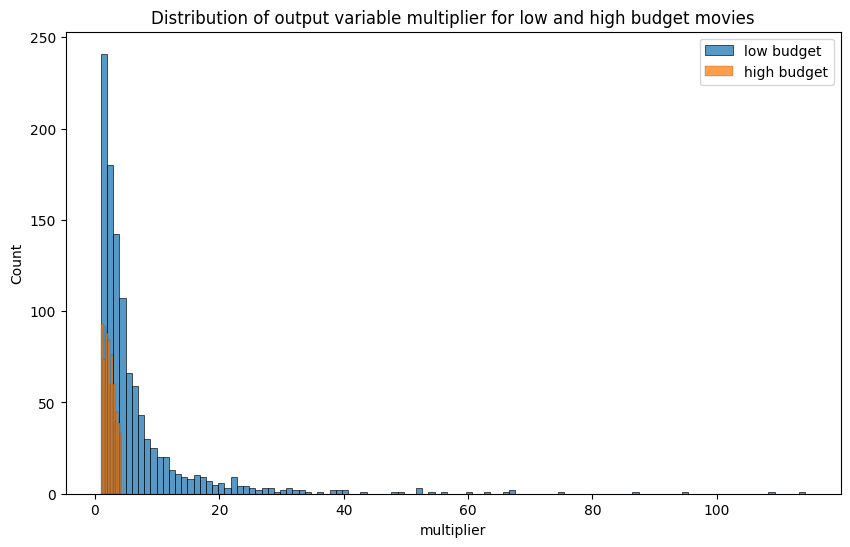

In [1017]:
# plot the disitribution of output variable for low and high budget movies
plt.figure(figsize=(10, 6))
sns.histplot(output_low, label='low budget')
sns.histplot(output_high, label='high budget')
plt.title('Distribution of output variable multiplier for low and high budget movies')
plt.legend()
plt.show()

We can see from the distribution above that our `multiplier` distribution is skewed, especially for the low budget category. If the distribution of the output variable is highly skewed, applying a log transformation can help make the distribution more symmetric. This is particularly useful when dealing with models that assume a normal distribution of errors (e.g., linear regression). In regression modeling, a log transformation can linearize relationships between variables. This can be advantageous if the underlying relationship between the predictors and the output is better approximated by a linear model after the log transformation.

In [1018]:
log_output_low = np.log(output_low)
log_output_high = np.log(output_high)

## Models testing

In [965]:
scaled_input_high = sm.add_constant(scaled_input_high)
X_train, X_test, y_train, y_test = train_test_split(scaled_input_high, log_output_high, test_size=0.15, random_state=42)
model = sm.OLS(y_train, X_train)
results = model.fit()
y_pred = results.predict(X_test)
print(r2_score(y_test, y_pred))
results.summary()

0.1872420186228284


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             multiplier   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.542
Date:                Thu, 21 Dec 2023   Prob (F-statistic):             0.0184
Time:                        05:14:59   Log-Likelihood:                -262.82
No. Observations:                 666   AIC:                             609.6
Df Residuals:                     624   BIC:                             798.7
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8462      0.192      4.396      0.000       0.468       1.224
runtime                                                  0.0218      0.113      0.194      0.846      -0.199       0.243
number_characters                                        0.3739      0.177      2.111      0.035       0.026       0.722
below18                                                  0.0900      0.176      0.512      0.609      -0.255       0.435
above60                                                 -0.0953      0.146     -0.651      0.515      -0.383       0.192
male_ratio                                               0.0538      0.085      0.636      0.525      -0.112       0.220
average_age                                              0.0158      0.232      0.068      0.946      -0.440       0.471
max_age                                                  0.0346      0.137      0.253      0.800      -0.234       0.303
min_age                                                  0.0379      0.129      0.293      0.770      -0.216       0.292
average_popularity                                       0.2121      0.326      0.651      0.515      -0.428       0.852
max_popularity                                          -0.0918      0.161     -0.571      0.568      -0.407       0.224
min_popularity                                          -0.1417      0.224     -0.631      0.528      -0.582       0.299
average_actor_exp                                       -0.0540      0.183     -0.294      0.769      -0.414       0.306
min_actor_exp                                            0.2814      0.167      1.690      0.091      -0.046       0.608
max_actor_exp                                            0.1603      0.164      0.979      0.328      -0.161       0.482
title_word_count                                         0.1070      0.088      1.215      0.225      -0.066       0.280
release_quarter                                          0.0032      0.043      0.076      0.940      -0.081       0.087
spoken_languages_count                                   0.3010      0.129      2.326      0.020       0.047       0.555
onehot_en                                               -0.1984      0.195     -1.018      0.309      -0.581       0.184
onehot_genres_thriller                                  -0.0067      0.042     -0.161      0.873      -0.088       0.075
onehot_genres_family                                    -0.0423      0.059     -0.716      0.474      -0.158       0.074
onehot_genres_history                                   -0.1000      0.079     -1.273      0.203      -0.254       0.054
onehot_genres_war                                       -0

### Best for high

In [966]:
# Trying same idea but with Robust Linear Model (RLM)
model = sm.RLM(y_train, X_train)
results = model.fit()
y_pred = results.predict(X_test)
print(r2_score(y_test, y_pred))
results.summary()

0.18780060661079223


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:             multiplier   No. Observations:                  666
Model:                            RLM   Df Residuals:                      624
Method:                          IRLS   Df Model:                           41
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 21 Dec 2023                                         
Time:                        05:15:01                                         
No. Iterations:                    28                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8673      0.208      4.162      0.000       0.459       1.276
runtime                                                  0.0106      0.122      0.087      0.931      -0.228       0.250
number_characters                                        0.3850      0.192      2.008      0.045       0.009       0.761
below18                                                  0.0918      0.190      0.482      0.629      -0.281       0.465
above60                                                 -0.1598      0.158     -1.008      0.313      -0.470       0.151
male_ratio                                               0.0569      0.092      0.621      0.535      -0.123       0.236
average_age                                              0.0218      0.251      0.087      0.931      -0.470       0.514
max_age                                                  0.0658      0.148      0.445      0.656      -0.224       0.356
min_age                                                  0.0449      0.140      0.320      0.749      -0.230       0.319
average_popularity                                       0.1461      0.353      0.414      0.679      -0.545       0.837
max_popularity                                          -0.0634      0.174     -0.365      0.715      -0.404       0.278
min_popularity                                          -0.1213      0.243     -0.499      0.617      -0.598       0.355
average_actor_exp                                       -0.0052      0.199     -0.026      0.979      -0.394       0.384
min_actor_exp                                            0.3031      0.180      1.681      0.093      -0.050       0.656
max_actor_exp                                            0.1361      0.177      0.768      0.443      -0.211       0.484
title_word_count                                         0.1099      0.095      1.153      0.249      -0.077       0.297
release_quarter                                         -0.0076      0.046     -0.164      0.870      -0.098       0.083
spoken_languages_count                                   0.3517      0.140      2.511      0.012       0.077       0.626
onehot_en                                               -0.2193      0.211     -1.039      0.299      -0.633       0.194
onehot_genres_thriller                                  -0.0091      0.045     -0.202      0.840      -0.097       0.079
onehot_genres_family                                    -0.0607      0.064     -0.948      0.343      -0.186       0.065
onehot_genres_history                                   -0.0969      0.085     -1.140      0.254      -0.264       0.070
onehot_genres_war                                       -0

### Best for low

In [967]:
scaled_input_low = sm.add_constant(scaled_input_low)
X_train, X_test, y_train, y_test = train_test_split(scaled_input_low, log_output_low, test_size=0.15, random_state=42)
model = sm.OLS(y_train, X_train)
results = model.fit()
y_pred = results.predict(X_test)
print(r2_score(y_test, y_pred))
results.summary()

0.015393708774638415


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             multiplier   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.193
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.40e-06
Time:                        05:15:02   Log-Likelihood:                -1155.4
No. Observations:                 916   AIC:                             2431.
Df Residuals:                     856   BIC:                             2720.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2479      0.336      6.690      0.000       1.588       2.907
runtime                                                  1.2119      0.474      2.556      0.011       0.281       2.142
number_characters                                       -1.1971      0.388     -3.089      0.002      -1.958      -0.436
below18                                                 -0.0490      0.350     -0.140      0.889      -0.735       0.637
above60                                                  0.0889      0.297      0.299      0.765      -0.494       0.672
male_ratio                                              -0.0576      0.144     -0.400      0.689      -0.340       0.225
average_age                                             -0.2594      0.677     -0.383      0.702      -1.588       1.069
max_age                                                 -0.1902      0.422     -0.451      0.652      -1.019       0.638
min_age                                                 -0.4419      0.463     -0.955      0.340      -1.350       0.466
average_popularity                                      -1.5499      0.847     -1.831      0.068      -3.212       0.112
max_popularity                                           0.6967      0.409      1.704      0.089      -0.106       1.499
min_popularity                                           0.5927      0.950      0.624      0.533      -1.272       2.457
average_actor_exp                                       -1.0547      0.688     -1.532      0.126      -2.406       0.296
min_actor_exp                                            1.0058      0.734      1.371      0.171      -0.434       2.446
max_actor_exp                                            0.2592      0.664      0.390      0.696      -1.045       1.563
title_word_count                                        -0.2584      0.229     -1.128      0.260      -0.708       0.191
release_quarter                                          0.0740      0.081      0.909      0.364      -0.086       0.234
spoken_languages_count                                   0.2385      0.285      0.837      0.403      -0.321       0.798
onehot_en                                               -0.0773      0.228     -0.339      0.735      -0.525       0.370
onehot_es                                                0.0024      0.392      0.006      0.995      -0.768       0.773
onehot_fr                                               -0.4522      0.309     -1.464      0.143      -1.058       0.154
onehot_hi                                               -0.0681      0.397     -0.171      0.864      -0.848       0.712
onehot_ja                                               -0

We will look at correlation between variables to see if there are some high correlated terms. 

In [968]:
# find pairs of features with correlation greater than 0.6
corr_matrix = scaled_input_low.corr().abs()
corr_matrix = corr_matrix.unstack().reset_index()
corr_matrix.columns = ['feature_1', 'feature_2', 'correlation']
corr_matrix = corr_matrix[corr_matrix['feature_1'] != corr_matrix['feature_2']]
corr_matrix = corr_matrix.sort_values(by='correlation', ascending=False)
corr_matrix = corr_matrix[corr_matrix['correlation'] > 0.6]
corr_matrix


,feature_1,feature_2,correlation
1454,onehot_ko,onehot_production_countries_south korea,1.000000
3134,onehot_production_countries_south korea,onehot_ko,1.000000
2972,onehot_production_countries_sweden,onehot_production_countries_denmark,0.960318
2732,onehot_production_countries_denmark,onehot_production_countries_sweden,0.960318
2583,onehot_production_countries_india,onehot_hi,0.874961
1323,onehot_hi,onehot_production_countries_india,0.874961
866,max_actor_exp,average_actor_exp,0.859770
746,average_actor_exp,max_actor_exp,0.859770
1158,onehot_en,onehot_production_countries_united_states_of_a...,0.781785
3678,onehot_production_countries_united_states_of_a...,onehot_en,0.781785


We can see that some of the features are highly correlated so we will include the interaction between them in the model.

In [969]:
# feature names
variables = results.params.index
# coefficients
coefficients = results.params.values
# p-values
p_values = results.pvalues
# standard errors
standard_errors = results.bse.values

l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))


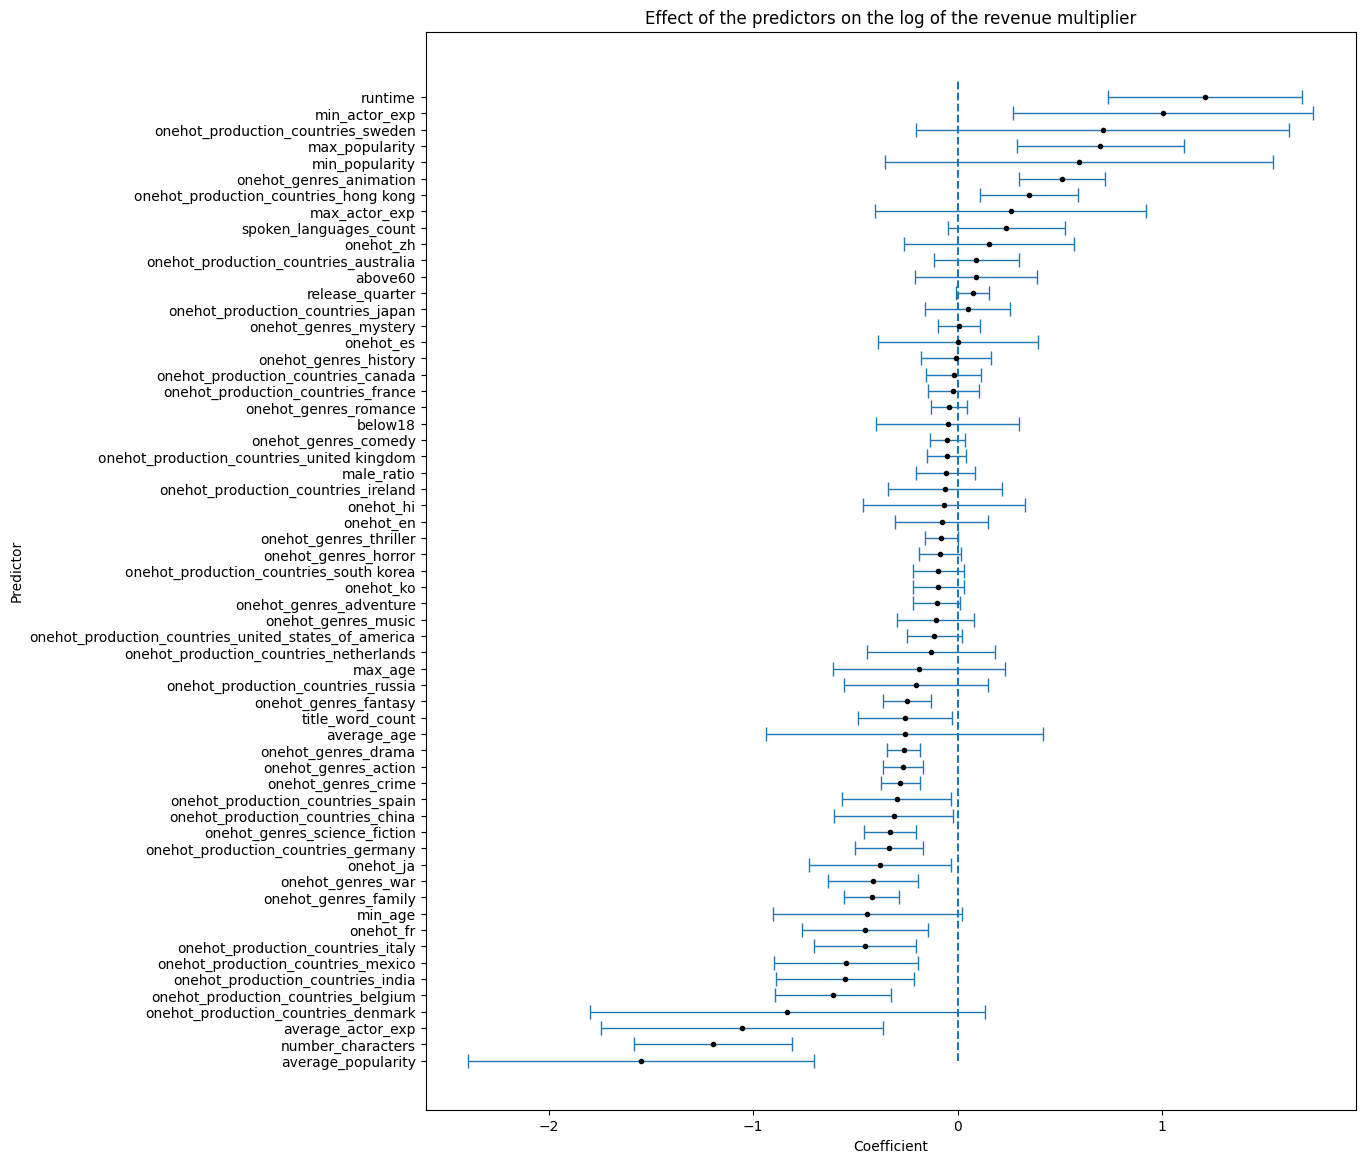

In [970]:
plt.figure(figsize=(12,14))
plt.errorbar(l1, np.array(range(len(l1))), xerr= np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')
plt.yticks(range(len(l2)),l2)
plt.title('Effect of the predictors on the log of the revenue multiplier')
plt.xlabel('Coefficient')
plt.ylabel('Predictor')
plt.show()

We can see from the graph above that some features are not significant and the confidence interval are crossing the 0 so we are not sure if the correlation with the output is positive or negative. That is why we are choosing to remove these variables and keep only features that are significant and have positive or negative correlation with the output.

we decide to take a 68% = 1 std confidence intervals to include more variables, and be less strict of the feature selection.

In [971]:
#keep only the significant variables so values that are in 68% confidence interval (1 standard deviation)
significant_variables = variables[1:][np.abs(coefficients[1:]) > 1*standard_errors[1:]]
significant_variables

Index(['runtime', 'number_characters', 'average_popularity', 'max_popularity',
       'average_actor_exp', 'min_actor_exp', 'title_word_count', 'onehot_fr',
       'onehot_ja', 'onehot_genres_family', 'onehot_genres_war',
       'onehot_genres_science_fiction', 'onehot_genres_action',
       'onehot_genres_drama', 'onehot_genres_crime', 'onehot_genres_animation',
       'onehot_genres_fantasy', 'onehot_production_countries_india',
       'onehot_production_countries_hong kong',
       'onehot_production_countries_italy',
       'onehot_production_countries_spain',
       'onehot_production_countries_mexico',
       'onehot_production_countries_belgium',
       'onehot_production_countries_china',
       'onehot_production_countries_germany'],
      dtype='object')

In [974]:
import statsmodels.formula.api as smf
df_l = pd.concat([scaled_input_low, log_output_low], axis=1)
df_l.columns = list(scaled_input_low.columns) + ['logmultiplier']
df_l.rename(columns={"onehot_production_countries_hong kong": "onehot_production_countries_hong_kong"}, inplace=True)
mod = smf.ols(formula= ' logmultiplier ~ runtime + number_characters + average_popularity*max_popularity+average_actor_exp*min_actor_exp+title_word_count+C(onehot_fr)*C(onehot_ja)+ C(onehot_genres_family)*C(onehot_genres_war)*C(onehot_genres_science_fiction)*C(onehot_genres_action)*C(onehot_genres_drama)*C(onehot_genres_crime)*C(onehot_genres_animation)*C(onehot_genres_fantasy) + C(onehot_production_countries_india)*C(onehot_production_countries_hong_kong)*C(onehot_production_countries_italy)*C(onehot_production_countries_spain)*C(onehot_production_countries_mexico)*C(onehot_production_countries_belgium)*C(onehot_production_countries_china)*C(onehot_production_countries_germany)',            data=df_l)

results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          logmultiplier   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.107
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.80e-07
Time:                        05:16:15   Log-Likelihood:                -1355.9
No. Observations:                1078   AIC:                             2874.
Df Residuals:                     997   BIC:                             3277.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

In [1065]:
############### HIGH BUDGET ######################
import statsmodels.formula.api as smf
df_l = pd.concat([scaled_input_high, log_output_high], axis=1)
df_l.columns = list(scaled_input_high.columns) + ['logmultiplier']
df_l.rename(columns={"onehot_production_countries_hong kong": "onehot_production_countries_hong_kong", "onehot_production_countries_united kingdom": "onehot_production_countries_united_kingdom"}, inplace=True)
mod = smf.ols(formula= ' logmultiplier ~ number_characters+min_actor_exp+title_word_count+spoken_languages_count*onehot_en+onehot_genres_history*onehot_genres_war*onehot_genres_science_fiction*onehot_genres_action*onehot_genres_crime+onehot_production_countries_hong_kong*onehot_production_countries_japan*onehot_production_countries_canada*onehot_production_countries_france*onehot_production_countries_germany*onehot_production_countries_united_kingdom',            data=df_l)
results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          logmultiplier   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.474
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           5.06e-07
Time:                        05:34:08   Log-Likelihood:                -300.22
No. Observations:                 784   AIC:                             694.4
Df Residuals:                     737   BIC:                             913.7
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

We can see that by keeping only features that are in the 68% confidence interval and adding their interactions terms we augmented the explained variance. We will keep this model for the following parts.

In [975]:
variables = results.params.index
# keep significant values only (p-value < 0.05)
significant_variables = variables[1:][results.pvalues[1:] < 0.05]
significant_variables 

Index(['C(onehot_genres_action)[T.1.0]', 'C(onehot_genres_drama)[T.1.0]',
       'C(onehot_genres_fantasy)[T.1.0]',
       'C(onehot_production_countries_india)[T.1.0]',
       'C(onehot_production_countries_germany)[T.1.0]',
       'C(onehot_production_countries_india)[T.1.0]:C(onehot_production_countries_spain)[T.1.0]',
       'C(onehot_genres_family)[T.1.0]:C(onehot_genres_science_fiction)[T.1.0]:C(onehot_genres_fantasy)[T.1.0]',
       'runtime', 'number_characters', 'average_actor_exp',
       'title_word_count'],
      dtype='object')

In [922]:
df_low_significant = scaled_input_low.copy()
df_low_significant['onehot_genres_family:onehot_genres_war:onehot_genres_action'] = df_low_significant['onehot_genres_family'] * df_low_significant['onehot_genres_war'] * df_low_significant['onehot_genres_action']
df_low_significant['onehot_genres_family:onehot_genres_action:onehot_genres_crime'] = df_low_significant['onehot_genres_family'] * df_low_significant['onehot_genres_action'] * df_low_significant['onehot_genres_crime']
df_low_significant['onehot_genres_war:onehot_genres_action:onehot_genres_crime'] = df_low_significant['onehot_genres_war'] * df_low_significant['onehot_genres_action'] * df_low_significant['onehot_genres_crime']
df_low_significant['onehot_genres_family:onehot_genres_science_fiction:onehot_genres_fantasy'] = df_low_significant['onehot_genres_family'] * df_low_significant['onehot_genres_science_fiction'] * df_low_significant['onehot_genres_fantasy']
df_low_significant['onehot_production_countries_india:onehot_production_countries_spain'] = df_low_significant['onehot_production_countries_india'] * df_low_significant['onehot_production_countries_spain']

### Classification

If we split the multipliers into 3 categories that are the low, medium and high values of the `multiplier`, we can try to perform a classification. We could then see if we arrive to predict if the multiplier will be low or high from the features.

In [976]:
class_output_low = pd.qcut(log_output_low, 3, labels=['low', 'medium', 'high'])
class_output_high = pd.qcut(log_output_high, 3, labels=['low', 'medium', 'high'])

In [978]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_squared_error


X = scaled_input_high  # Two features for simplicity
y = class_output_high # Binary classification based on a simple condition

# Split the data into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=400, max_depth=20, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.39

Classification Report:
              precision    recall  f1-score   support

        high       0.44      0.46      0.45        65
         low       0.44      0.42      0.43        69
      medium       0.29      0.29      0.29        62

    accuracy                           0.39       196
   macro avg       0.39      0.39      0.39       196
weighted avg       0.39      0.39      0.39       196



We can see from the classification above that the accuracy of 39% is quite low given that with 3 balanced classes the random chance would be arounf 33%. We can still see that the f1-score for the class of high and low multiplier are higher than the medium class. It signifies that the model is performing better in terms of both precision and recall for that particular class. This could mean that we are able to identify the features that will end in a low multiplier and the one that will give a high one, but the middle class have attributes of both other and it is difficult to separate it from the two other.

## Optimisation of linear Regression

We have seen in the previous part that the model that obtains the highest R-square score of and so the model that have the highest explained variance is the linear model. We know that this model can be an overfit, but it can give us some idea of the best choice to make for the producers. 
We will then use the linear model to predict the maximal `multiplier` the producers can obtain. We will also be able to give them the best features to have for their film to achieve this multiplier. 

### Model for the High budget

In [1071]:
input = scaled_input_high
output = log_output_high
model = sm.OLS(output, input)
results = model.fit()

From the linear model we are using the coeficients estimated.

In [1072]:
# these are the parameters for the model prediction
results.params

const                                                  -7.642448e-17
runtime                                                 1.774284e-01
number_characters                                       4.656794e-01
below18                                                 2.993870e-01
above60                                                -2.747800e-01
male_ratio                                              9.014371e-02
average_age                                             2.053320e-01
max_age                                                 1.440269e-01
min_age                                                 2.096864e-01
average_popularity                                      3.312039e-01
max_popularity                                         -1.128087e-01
min_popularity                                         -1.696061e-01
average_actor_exp                                      -1.065537e-01
min_actor_exp                                           1.697568e-01
max_actor_exp                     

### Set bounds

We have to set the bounds for the optimisation. Since we scaled the features to [0,1] the boounds are simply [0,1].

In [1073]:
bounds = []
for column in input.columns:
    bounds.append((0, 1))

#### Set Constraints

we know that some of the features, like the number of actors have to be integer bacause we can't take 3.5 actors in a film. that is why we have to set some constraints on this values to have only some possible value in the range defined by the bounds.

In [1074]:
def get_integer_constraint(features):
   sum = 0
   for feature in features:
      sum += np.abs(np.floor(feature) - feature)
   return sum

integer_constraint = {'type': 'eq', 'fun': get_integer_constraint}

### Define Initial Guess

For the optimisation to work we have to define an initial guess. In our case we want to have the maximal `multiplier` as possible so we can use the maximal `multiplier` of our dataset as the initial guess of max multiplier.

In [1075]:
def find_init_guess(input, output, name_output_column = 'multiplier'):
    '''
    Find the initial guess for the optimization algorithm
    :param dataframe: dataframe with the data
    :param name_output_column: name of the output column to maximize
    :return: initial guess of the features to maximize the output, the max value of the output and the index of the max value
    '''
    dataframe = pd.concat([input, output], axis=1)
    max = dataframe[name_output_column].max()
    idx_max = dataframe[name_output_column].idxmax()
    features = dataframe.loc[idx_max].drop(name_output_column).values
    return features, max, idx_max

In [1076]:
init_features, initial_max, _ = find_init_guess(input, output)

### Perform Optimization

Now we perform the optimisation. We want to have the max value of the `multiplier`. The function *optimise.minimize* is a minimization function so we will simply add a - sign at the model prediction to have a maximization of the output. The model_prediction is then the sum of the coeficients founs by the linear regression model times the features.

In [1077]:
from scipy import optimize

# Your trained model
def model_prediction(features):
    prediction = (features * results.params).sum()
    # prediction = model.predict(features)
    return prediction

# Objective function for optimization
def objective_function(features):
    return -model_prediction(features)  #Minimize the negative of the output

# Optimize feature values
result = optimize.minimize(objective_function, init_features, method='SLSQP', bounds=bounds)#, constraints=[integer_constraint] , options={'eps': 0.1})

# Optimized feature values
optimized_features = result.x

# Evaluate the model with optimized features
optimized_output = model_prediction(optimized_features)

In [1078]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.6124703326366014
       x: [ 1.507e-15  1.000e+00 ...  2.194e-15  2.013e-15]
     nit: 24
     jac: [ 0.000e+00 -1.774e-01 ...  1.132e-01  1.595e-02]
    nfev: 1032
    njev: 24

We can see that the optimisation terminated sucessfully.

Then we rescale to the original scale the features to have the real features values.

In [1079]:
optimized_features_original_scale = scaler_high_budget.inverse_transform([optimized_features])
init_features_original_scale = scaler_high_budget.inverse_transform([init_features])

We apply an exponential to the log output to have the original value of multiplier.

In [1080]:
optimized_output_exp = np.exp(optimized_output)
initial_max_exp = np.exp(initial_max)

We look at the difference in results between the initial guess and the optimize features.

In [1081]:
print("Optimized features: {}".format(np.around(optimized_features_original_scale[0], 3)))
print("Optimized output: {}".format(np.around(optimized_output_exp, decimals=3)))
print("Initial features: {}".format(np.around(init_features_original_scale, decimals=3)))
print("Initial output: {}".format(initial_max_exp, decimals=3))

Optimized features: [1.0000e+00 1.9100e+02 4.7000e+01 6.6700e-01 0.0000e+00 1.0000e+00
 6.5400e+01 9.5000e+01 4.8000e+01 8.6072e+01 1.3221e+01 9.9750e+00
 1.0000e-01 8.0000e+00 6.2000e+01 1.1000e+01 4.0000e+00 1.1000e+01
 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
Optimized output: 37.057
Initial features: [[1.00000e+00 1.69000e+02 1.90000e+01 5.30000e-02 2.63000e-01 6.84000e-01
  4.55790e+01 8.20000e+01 1.40000e+01 3.15150e+01 1.04258e+02 1.12110e+01
  7.94700e+00 0.00000e+00 3.10000e+01 1.00000e+00 4.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+

The prediction of maximal multiplier is `optimized_output`.

We can do the same now for the low budgets.

### Model for the Low budgets

In [1082]:
input = scaled_input_low
output = log_output_low
model = sm.OLS(output, input)
results = model.fit()

bounds = []
for column in input.columns:
    bounds.append((0, 1))

init_features, initial_max, _ = find_init_guess(input, output)

result = optimize.minimize(objective_function, init_features, method='SLSQP', bounds=bounds)#, constraints=[integer_constraint] , options={'eps': 0.1})
optimized_features = result.x
optimized_output = model_prediction(optimized_features)

In [1083]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -11.118081184917717
       x: [ 5.299e-15  1.000e+00 ...  1.124e-15  5.415e-14]
     nit: 15
     jac: [ 0.000e+00 -2.772e+00 ...  6.373e-02  7.598e-02]
    nfev: 930
    njev: 15

In [1084]:
optimized_features_original_scale = scaler_low_budget.inverse_transform([optimized_features])
init_features_original_scale = scaler_low_budget.inverse_transform([init_features])

In [1085]:
optimized_output_exp = np.exp(optimized_output)
initial_max_exp = np.exp(initial_max)

In [1086]:
print("Optimized features: {}".format(np.around(optimized_features_original_scale[0], 3)))
print("Optimized output: {}".format(np.around(optimized_output_exp, decimals=3)))
print("Initial features: {}".format(np.around(init_features_original_scale, decimals=3)))
print("Initial output: {}".format(initial_max_exp, decimals=3))

Optimized features: [  1.    224.      1.      1.      0.      1.     79.      9.     79.
  10.144 183.746 104.258   0.     23.      0.      1.      4.      9.
   1.      1.      1.      1.      1.      1.      1.      1.      0.
   0.      0.      0.      0.      1.      1.      0.      0.      1.
   0.      0.      1.      1.      0.      0.      0.      1.      0.
   1.      0.      0.      1.      1.      0.      1.      1.      0.
   0.      0.      0.      1.      0.      0.      0.   ]
Optimized output: 67378.495
Initial features: [[ 1.    92.     2.     0.     0.     1.    24.    24.    24.    13.957
  14.249 13.665  0.     0.     0.     1.     4.     1.     1.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     1.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   1.   ]]
Initial output: 114.27488667

We can see that because the model overfitted our data for the low budgets, the maximize value of the output is not a possible one. Netherless, we could think that the these features can be the ones that have the highest score but we can't be sure. It will be difficult to hepl our low budget movie producers because the variance in the low bidgets movies is really big. We can't find a real trend on the features selsction and the choice is more random. 